Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz.

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('states_all.csv')
df

Saving states_all.csv to states_all.csv


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [0]:
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1918 non-null   object 
 1   STATE                         1918 non-null   object 
 2   YEAR                          1918 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [0]:
states = df.copy()


Considering the nature of the survey, using the state averages will give us a better insight. 

In [0]:
fill_list = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [0]:
state_unique = states['STATE'].unique ()
print (state_unique)

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'DISTRICT OF COLUMBIA'
 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA'
 'NORTH DAKOTA' 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA'
 'WEST VIRGINIA']


In [0]:
for col in fill_list:
    for state in state_unique:
        states.loc[states["STATE"] == state, fill_list] = states.loc[states["STATE"] == state, fill_list].interpolate(method ='linear', limit_direction ='forward', limit = 1918)
states

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,108384.0,1788749.0,155453.0,985365.0,647931.0,1963630.0,867650.0,474679.0,117979.0,412047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,133856.0,2401541.0,175379.0,940989.0,1285173.0,2358654.0,1340088.0,811796.0,90433.0,45441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,743320.0,9161667.0,840786.0,4262164.0,4058717.0,9187299.0,4274682.0,3013294.0,458918.0,1073334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,134045.0,1455737.0,196644.0,438629.0,820464.0,1475864.0,730176.0,440580.0,78149.0,192504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [0]:
states.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1918 non-null   object 
 1   STATE                         1918 non-null   object 
 2   YEAR                          1918 non-null   int64  
 3   ENROLL                        1515 non-null   float64
 4   TOTAL_REVENUE                 1566 non-null   float64
 5   FEDERAL_REVENUE               1566 non-null   float64
 6   STATE_REVENUE                 1566 non-null   float64
 7   LOCAL_REVENUE                 1566 non-null   float64
 8   TOTAL_EXPENDITURE             1566 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1566 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1566 non-null   float64
 11  OTHER_EXPENDITURE             1515 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1566 non-null   float64
 13  GRA

In [0]:
clean_states = states.dropna()

In [0]:
clean_states.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 255 to 1906
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1021 non-null   object 
 1   STATE                         1021 non-null   object 
 2   YEAR                          1021 non-null   int64  
 3   ENROLL                        1021 non-null   float64
 4   TOTAL_REVENUE                 1021 non-null   float64
 5   FEDERAL_REVENUE               1021 non-null   float64
 6   STATE_REVENUE                 1021 non-null   float64
 7   LOCAL_REVENUE                 1021 non-null   float64
 8   TOTAL_EXPENDITURE             1021 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1021 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1021 non-null   float64
 11  OTHER_EXPENDITURE             1021 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1021 non-null   float64
 13  G

In [0]:
clean_states.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 255 to 1906
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1021 non-null   object 
 1   STATE                         1021 non-null   object 
 2   YEAR                          1021 non-null   int64  
 3   ENROLL                        1021 non-null   float64
 4   TOTAL_REVENUE                 1021 non-null   float64
 5   FEDERAL_REVENUE               1021 non-null   float64
 6   STATE_REVENUE                 1021 non-null   float64
 7   LOCAL_REVENUE                 1021 non-null   float64
 8   TOTAL_EXPENDITURE             1021 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1021 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1021 non-null   float64
 11  OTHER_EXPENDITURE             1021 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1021 non-null   float64
 13  G

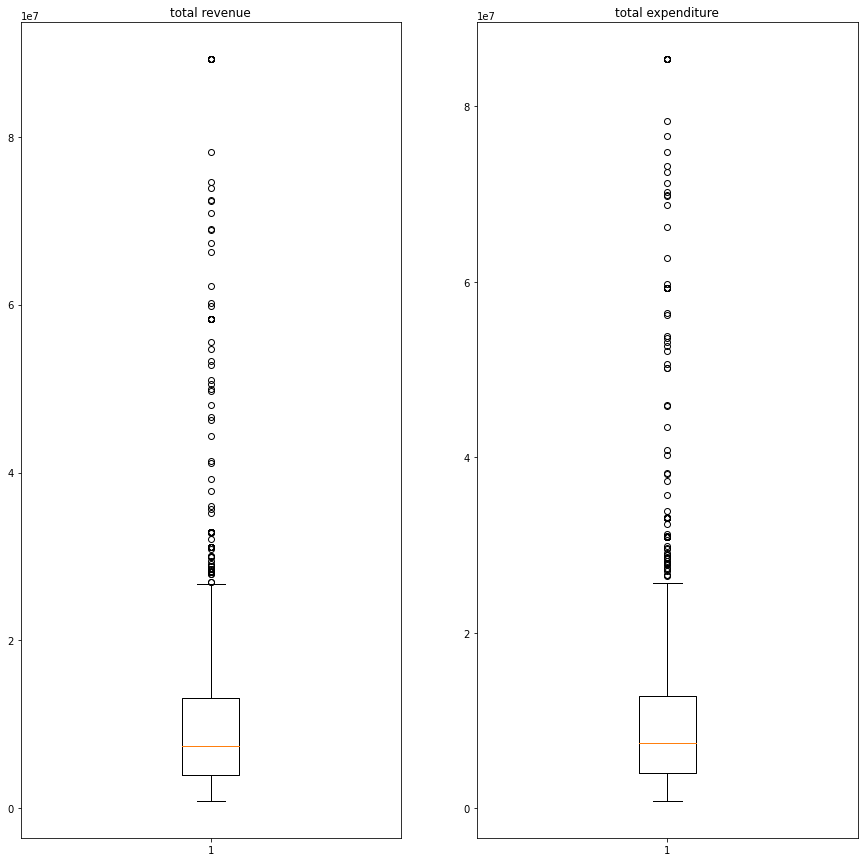

In [0]:
plt.figure(figsize = (15,15))

plt.subplot(1,2,1)
plt.boxplot(clean_states["TOTAL_REVENUE"])
plt.title("total revenue")

plt.subplot(1,2,2)
plt.boxplot(clean_states["TOTAL_EXPENDITURE"])
plt.title("total expenditure")
plt.show()

The data does have outliers. 

In [0]:
clean_states['State_deficit'] = (clean_states['TOTAL_REVENUE'] - clean_states['TOTAL_EXPENDITURE'])
clean_states

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,State_deficit
255,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,1075352.0,323955.0,420070.0,9886.000000,58326.0,57431.0,58210.0,44272.0,472847.0,2.081480e+05,749207.0,213.220493,257.985699,209.910583,259.901646,18164.0
257,1997_ARIZONA,ARIZONA,1997,783552.0,4343262.0,405291.0,1907516.0,2030455.0,4432360.0,1977550.0,1252277.0,265183.0,678793.0,4674.000000,63857.0,65170.0,60138.0,44259.0,522450.0,2.177640e+05,814113.0,217.873610,268.584977,206.234160,265.092588,-89098.0
258,1997_ARKANSAS,ARKANSAS,1997,457349.0,2355859.0,218137.0,1387107.0,750615.0,2379496.0,1291727.0,667439.0,158337.0,192204.0,1672.000000,35761.0,34067.0,36229.0,29204.0,282911.0,1.334490e+05,456497.0,216.150544,261.580487,209.848736,270.877147,-23637.0
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,10040400.0,1792979.0,3088674.0,76584.000000,463684.0,451069.0,412604.0,317595.0,3591033.0,1.578929e+06,5803887.0,210.238093,262.622115,202.913590,268.021605,1752653.0
260,1997_COLORADO,COLORADO,1997,672634.0,4133275.0,205038.0,1784304.0,2143933.0,4398196.0,2188731.0,1205308.0,154175.0,678631.0,12861.000000,51408.0,53023.0,52632.0,39263.0,429624.0,1.922590e+05,687167.0,227.146894,276.721306,221.940063,266.017175,-264921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1988_WYOMING,WYOMING,1988,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,1084.500000,8306.0,8007.0,7158.0,6753.0,58998.0,2.711129e+04,97793.0,247.290192,287.714179,227.496007,264.778365,10440.0
1903,1989_WYOMING,WYOMING,1989,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,1224.666667,7865.0,8126.0,6959.0,6281.0,58998.0,2.717371e+04,97172.0,247.422799,287.976087,227.329808,265.926637,10440.0
1904,1990_WYOMING,WYOMING,1990,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,1364.833333,7812.0,7935.0,7376.0,6245.0,58998.0,2.723614e+04,98226.0,247.555406,288.237996,227.163609,267.074910,10440.0
1905,1991_WYOMING,WYOMING,1991,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,1505.000000,7606.0,8269.0,7511.0,6425.0,58998.0,2.729857e+04,102074.0,247.688012,288.499904,226.997410,268.223183,10440.0


Text(0.5, 1.0, 'State Deficit')

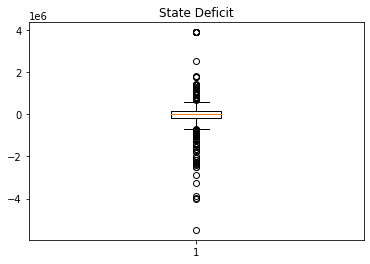

In [0]:
plt.boxplot(clean_states["State_deficit"])
plt.title("State Deficit")

Deficit also has outliers

In [0]:
from scipy.stats.mstats import winsorize

winsorized_deficit = winsorize(clean_states["State_deficit"], (0, 0.20))

winsorized_deficit

masked_array(data=[ 18164., -89098., -23637., ...,  10440.,  10440.,
                    10440.],
             mask=False,
       fill_value=1e+20)

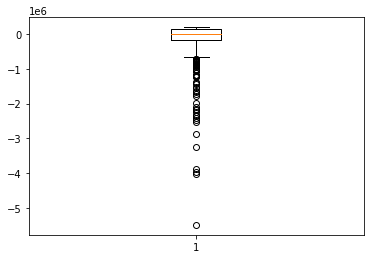

In [0]:
plt.boxplot(winsorized_deficit)
plt.show()


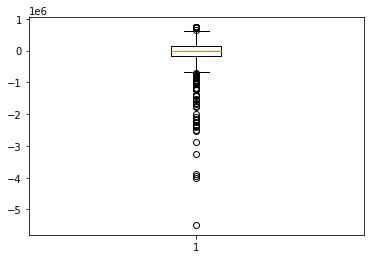

In [0]:
winsorized_deficit = winsorize(clean_states["State_deficit"], (0, 0.10))
plt.boxplot(winsorized_deficit)
plt.show()

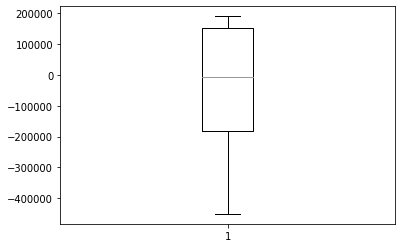

In [0]:
winsorized_deficit = winsorize(clean_states["State_deficit"], (0.1, 0.2))
plt.boxplot(winsorized_deficit)
plt.show()

In [0]:
There still seems to be outliers 

In [0]:
winsorized_revenue = winsorize(clean_states["TOTAL_REVENUE"])
winsorized_expenditure = winsorize(clean_states["TOTAL_EXPENDITURE"])
budget_deficit2 = winsorized_revenue - winsorized_expenditure


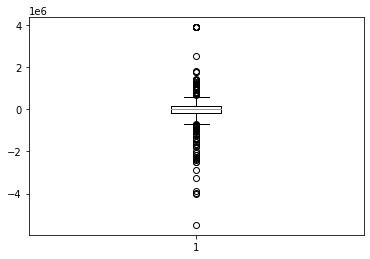

In [0]:
plt.boxplot(budget_deficit2)
plt.show()

In [0]:
winsorized_deficit2 = winsorize(budget_deficit2)


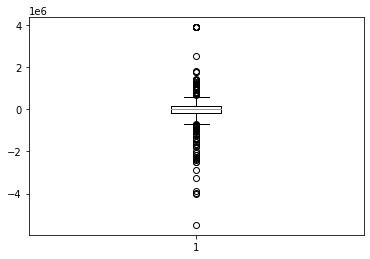

In [0]:
plt.boxplot(winsorized_deficit2, whis=1.5)
plt.show()